# Anova Insurance — Health Status Classification
### Predictive Modeling for Insurance Premium Pricing

**Problem Statement:**  
Anova Insurance seeks to optimize insurance policy premium pricing based on the health status of applicants. This notebook develops a predictive model that classifies individuals as **Healthy (0)** or **Unhealthy (1)** using health data, enabling informed decisions on:
- Eligibility for health insurance coverage
- Premium rate determination based on health risk

---
**Dataset:** 10,000 rows × 23 columns (after preprocessing/encoding)  
**Target Variable:** `Target` — Binary (0 = Healthy, 1 = Unhealthy)

## Table of Contents
1. [Import Libraries](#1)
2. [Load & Inspect Data](#2)
3. [Exploratory Data Analysis (EDA)](#3)
4. [Data Preprocessing](#4)
5. [Feature Engineering & Selection](#5)
6. [Model Building](#6)
7. [Model Evaluation & Comparison](#7)
8. [Best Model Deep Dive](#8)
9. [Feature Importance](#9)
10. [Conclusion & Recommendations](#10)

---
## 1. Import Libraries <a id='1'></a>

In [12]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Sklearn — preprocessing & utilities
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Sklearn — models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Sklearn — metrics
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, f1_score, precision_score,
    recall_score, ConfusionMatrixDisplay
)

# Plot styling
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 11

print('All libraries imported successfully.')

All libraries imported successfully.


---
## 2. Load & Inspect Data <a id='2'></a>

In [13]:
df = pd.read_csv('mDugQt7wQOKNNIAFjVku_Healthcare_Data_Preprocessed_FIXED(1).csv')

print(f'Dataset Shape: {df.shape}')
print(f'Rows: {df.shape[0]:,} | Columns: {df.shape[1]}')
df.head(10)

Dataset Shape: (10000, 23)
Rows: 10,000 | Columns: 23


,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,37.0,26.0,111.0,198.0,99.0,72.0,5.5,1.7,1.6,4.4,...,1,2,1,0.0,1.0,False,True,True,False,False
1,37.0,24.0,121.0,199.0,103.0,75.0,4.5,1.9,2.6,5.6,...,1,2,1,2.0,2.0,False,False,True,False,False
2,81.0,27.0,NaN,NaN,100.0,74.0,12.1,2.9,2.6,1.8,...,2,0,0,1.0,0.0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,4.3,1.0,1.7,5.2,...,1,2,1,2.0,0.0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,16.0,5.0,3.4,1.4,...,2,0,2,0.0,2.0,False,True,False,True,False
5,100.0,26.0,164.0,NaN,100.0,71.0,14.7,4.7,3.7,1.6,...,2,2,1,1.0,1.0,True,False,False,True,False
6,18.0,27.0,150.0,199.0,100.0,71.0,16.0,5.0,3.8,2.3,...,0,2,0,2.0,2.0,False,False,False,False,True
7,65.0,28.0,NaN,202.0,99.0,73.0,9.0,2.2,2.3,3.5,...,2,2,0,0.0,NaN,True,False,False,False,True
8,17.0,26.0,129.0,198.0,97.0,74.0,16.0,4.4,2.9,0.0,...,1,1,1,0.0,0.0,False,False,True,False,False
9,18.0,27.0,124.0,198.0,104.0,73.0,16.0,5.0,3.1,0.0,...,1,1,0,2.0,2.0,False,True,False,False,True


In [14]:
print('--- Data Types ---')
print(df.dtypes)
print()
print('--- Statistical Summary ---')
df.describe()

--- Data Types ---
Age                     float64
BMI                     float64
Blood_Pressure          float64
Cholesterol             float64
Glucose_Level           float64
Heart_Rate              float64
Sleep_Hours             float64
Exercise_Hours          float64
Water_Intake            float64
Stress_Level            float64
Target                    int64
Smoking                   int64
Alcohol                   int64
Diet                      int64
MentalHealth              int64
PhysicalActivity          int64
MedicalHistory          float64
Allergies               float64
Diet_Type_Vegan            bool
Diet_Type_Vegetarian       bool
Blood_Group_AB             bool
Blood_Group_B              bool
Blood_Group_O              bool
dtype: object

--- Statistical Summary ---


,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Target,Smoking,Alcohol,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies
count,10000.000000,10000.000000,9471.000000,9462.000000,9486.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9465.000000,9479.000000
mean,40.228000,25.711500,130.922395,199.193934,100.154122,73.531400,8.005780,2.43173,2.477490,4.508820,0.499900,0.994500,0.992700,1.005500,0.99670,1.000600,1.001796,0.996308
std,24.350238,1.944594,27.807917,2.080687,2.205152,1.724329,4.205662,1.32928,0.634218,1.817407,0.500025,0.815681,0.816525,0.816172,0.82326,0.809979,0.813361,0.816251
min,0.000000,19.000000,22.000000,192.000000,93.000000,67.000000,0.000000,0.00000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25.000000,24.000000,114.000000,198.000000,99.000000,72.000000,5.000000,1.50000,2.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,37.000000,26.000000,135.000000,199.000000,100.000000,74.000000,6.300000,2.00000,2.400000,4.800000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,49.000000,27.000000,150.000000,200.000000,102.000000,75.000000,10.800000,3.30000,2.900000,5.800000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
max,100.000000,32.000000,225.000000,207.000000,107.000000,80.000000,16.000000,5.00000,4.600000,10.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000


Columns with Missing Values:


,Missing Count,Missing %
Cholesterol,538,5.38
MedicalHistory,535,5.35
Blood_Pressure,529,5.29
Allergies,521,5.21
Glucose_Level,514,5.14


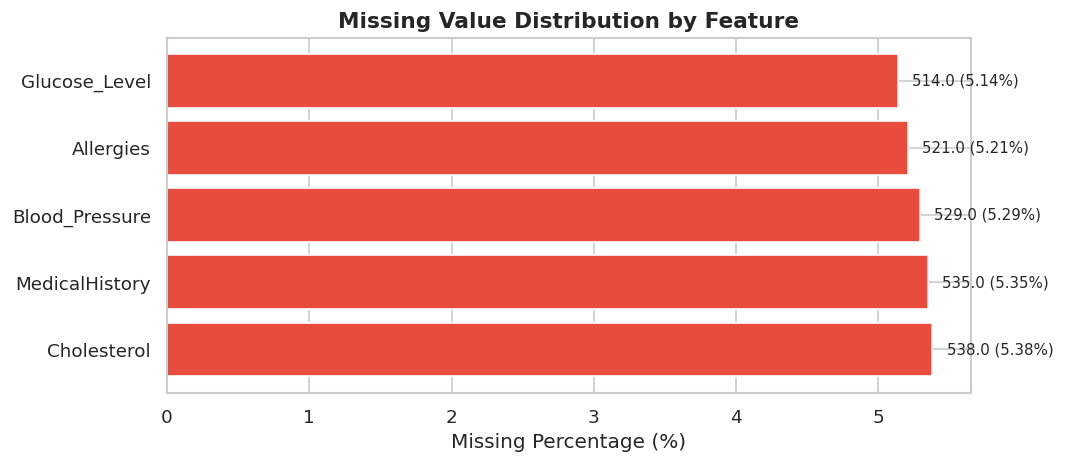

In [15]:
# Missing value analysis
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print('Columns with Missing Values:')
display(missing_df)

# Visualize missing values
fig, ax = plt.subplots(figsize=(9, 4))
ax.barh(missing_df.index, missing_df['Missing %'], color='#E74C3C', edgecolor='white')
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Missing Value Distribution by Feature', fontweight='bold', fontsize=13)
for i, (idx, row) in enumerate(missing_df.iterrows()):
    ax.text(row['Missing %'] + 0.1, i, f"{row['Missing Count']} ({row['Missing %']}%)", va='center', fontsize=9)
plt.tight_layout()
plt.show()

Target Class Distribution:
  Healthy   (0): 5,001 (50.0%)
  Unhealthy (1): 4,999 (50.0%)


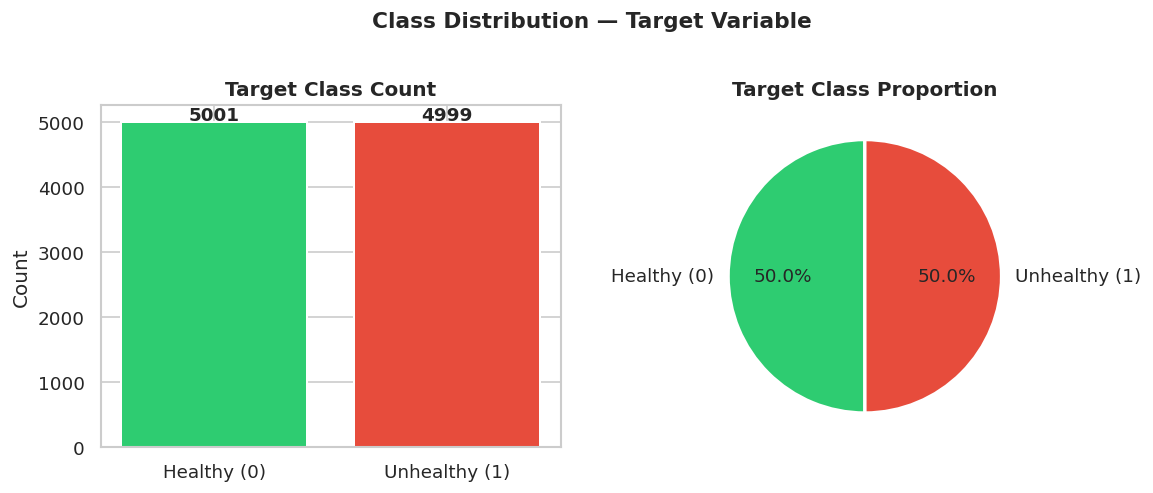

In [16]:
# Target class distribution
target_counts = df['Target'].value_counts()
target_pct = df['Target'].value_counts(normalize=True) * 100

print('Target Class Distribution:')
print(f'  Healthy   (0): {target_counts[0]:,} ({target_pct[0]:.1f}%)')
print(f'  Unhealthy (1): {target_counts[1]:,} ({target_pct[1]:.1f}%)')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart
axes[0].bar(['Healthy (0)', 'Unhealthy (1)'], target_counts.values,
            color=['#2ECC71', '#E74C3C'], edgecolor='white', linewidth=1.2)
axes[0].set_title('Target Class Count', fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 30, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['Healthy (0)', 'Unhealthy (1)'],
            autopct='%1.1f%%', colors=['#2ECC71', '#E74C3C'],
            startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[1].set_title('Target Class Proportion', fontweight='bold')

plt.suptitle('Class Distribution — Target Variable', fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 3. Exploratory Data Analysis (EDA) <a id='3'></a>

In [17]:
# Convert boolean columns to int for analysis
bool_cols = ['Diet_Type_Vegan', 'Diet_Type_Vegetarian', 'Blood_Group_AB', 'Blood_Group_B', 'Blood_Group_O']
for col in bool_cols:
    df[col] = df[col].astype(int)

# Numerical columns
num_cols = ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose_Level',
            'Heart_Rate', 'Sleep_Hours', 'Exercise_Hours', 'Water_Intake', 'Stress_Level']

# Categorical ordinal columns
cat_cols = ['Smoking', 'Alcohol', 'Diet', 'MentalHealth', 'PhysicalActivity', 'MedicalHistory', 'Allergies']

print('Numerical features:', num_cols)
print('Ordinal categorical features:', cat_cols)

Numerical features: ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose_Level', 'Heart_Rate', 'Sleep_Hours', 'Exercise_Hours', 'Water_Intake', 'Stress_Level']
Ordinal categorical features: ['Smoking', 'Alcohol', 'Diet', 'MentalHealth', 'PhysicalActivity', 'MedicalHistory', 'Allergies']


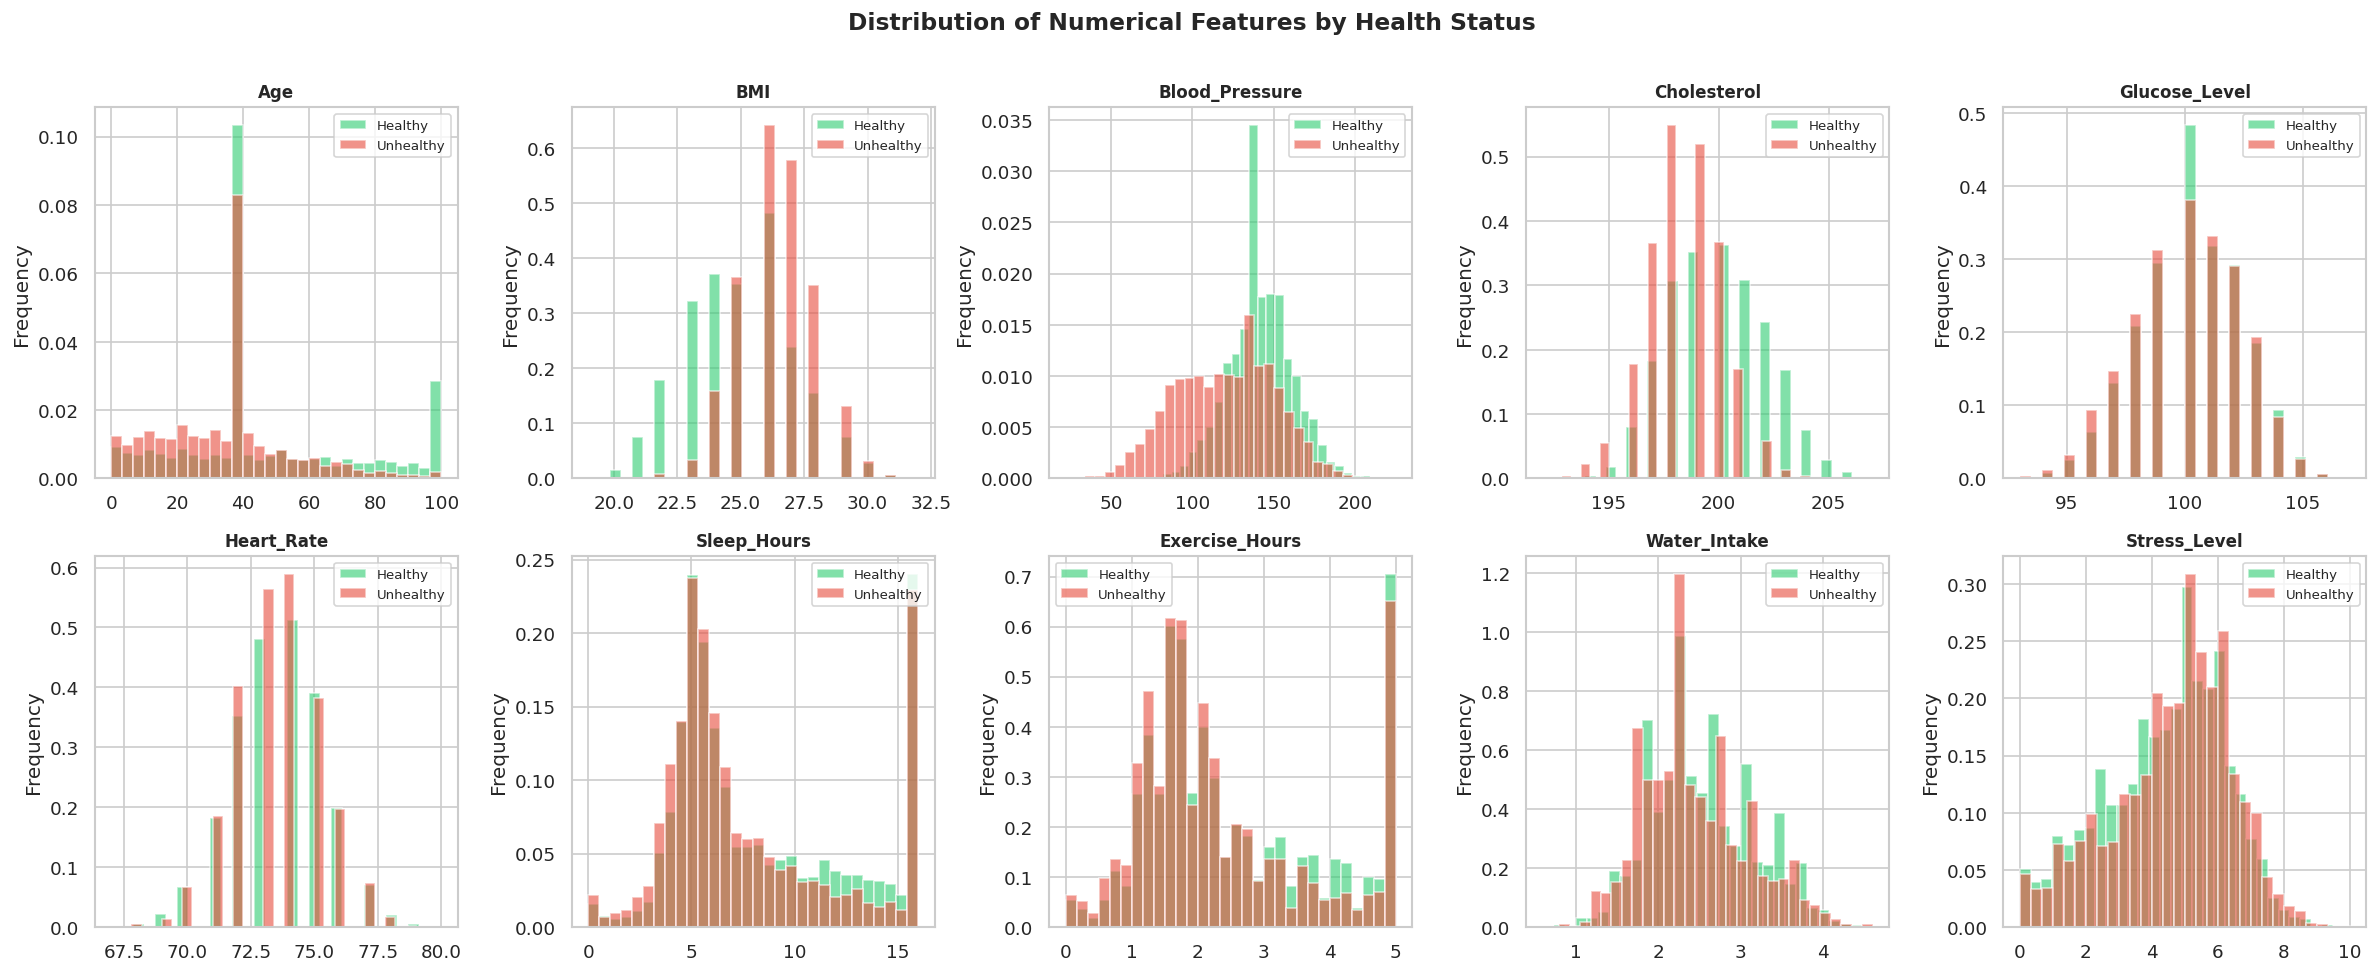

In [18]:
# Distribution of numerical features
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

colors_healthy = '#2ECC71'
colors_unhealthy = '#E74C3C'

for i, col in enumerate(num_cols):
    ax = axes[i]
    df[df['Target'] == 0][col].dropna().plot(kind='hist', bins=30, ax=ax,
                                              alpha=0.6, color=colors_healthy, label='Healthy', density=True)
    df[df['Target'] == 1][col].dropna().plot(kind='hist', bins=30, ax=ax,
                                              alpha=0.6, color=colors_unhealthy, label='Unhealthy', density=True)
    ax.set_title(col, fontweight='bold', fontsize=10)
    ax.set_xlabel('')
    ax.legend(fontsize=8)

plt.suptitle('Distribution of Numerical Features by Health Status', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

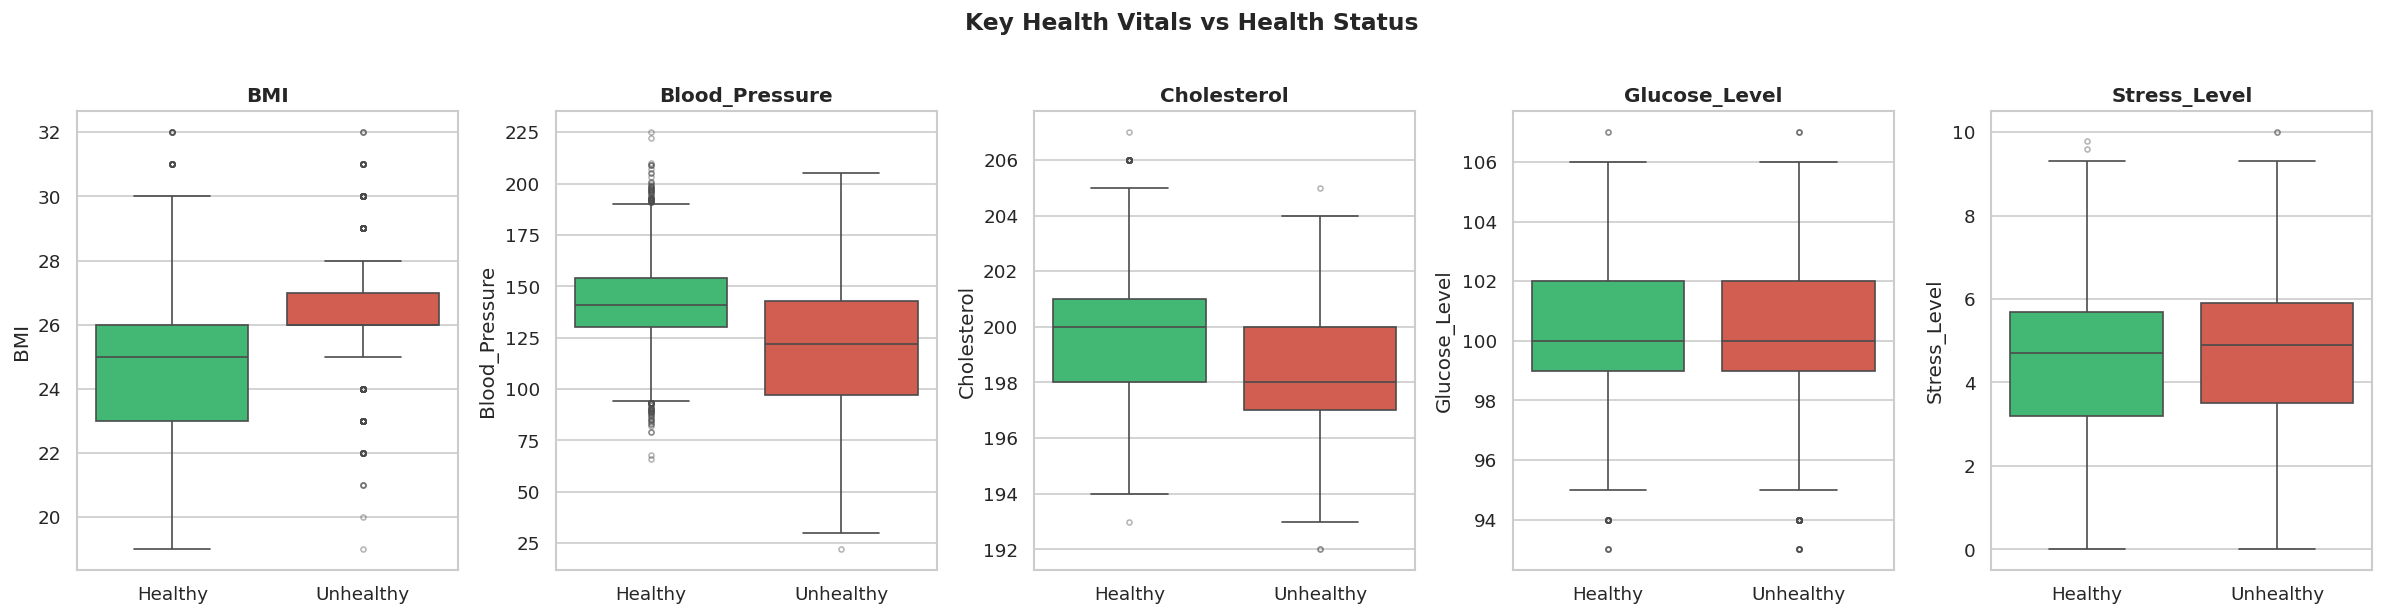

In [19]:
# Boxplots: Key vitals vs Target
key_vitals = ['BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose_Level', 'Stress_Level']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, col in enumerate(key_vitals):
    sns.boxplot(
        data=df, x='Target', y=col, ax=axes[i],
        hue='Target',
        palette={0: '#2ECC71', 1: '#E74C3C'},
        order=[0, 1],
        legend=False,
        flierprops={'marker': 'o', 'markersize': 3, 'alpha': 0.4}
    )
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Healthy', 'Unhealthy'])
    axes[i].set_xlabel('')

plt.suptitle('Key Health Vitals vs Health Status', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

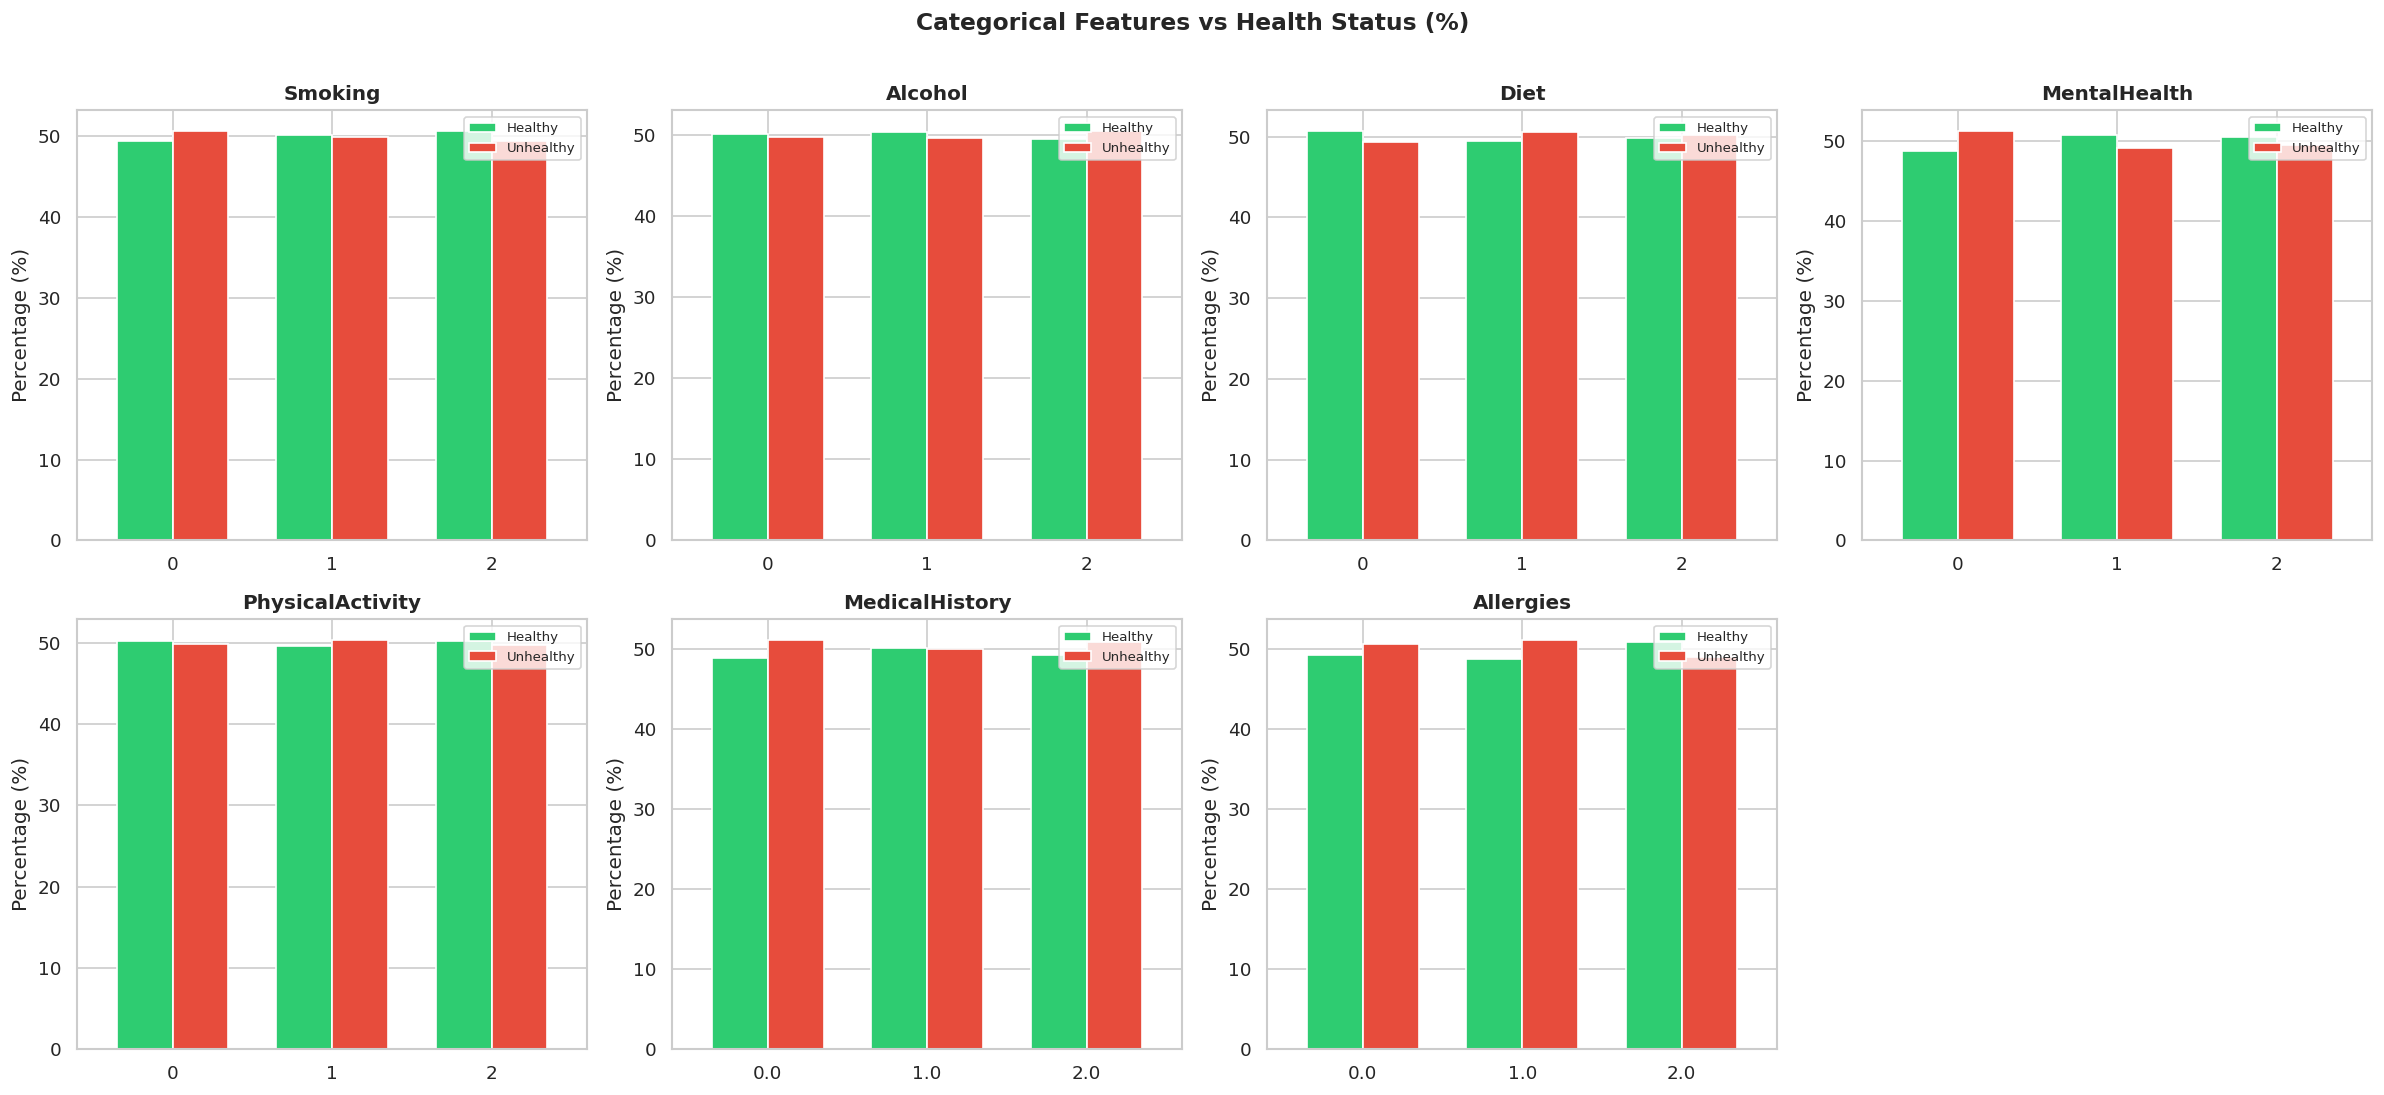

In [20]:
# Categorical ordinal features vs Target
fig, axes = plt.subplots(2, 4, figsize=(20, 9))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    ct = pd.crosstab(df[col], df['Target'], normalize='index') * 100
    ct.columns = ['Healthy', 'Unhealthy']
    ct.plot(kind='bar', ax=ax, color=['#2ECC71', '#E74C3C'], edgecolor='white', width=0.7)
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(fontsize=8)

axes[-1].set_visible(False)
plt.suptitle('Categorical Features vs Health Status (%)', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

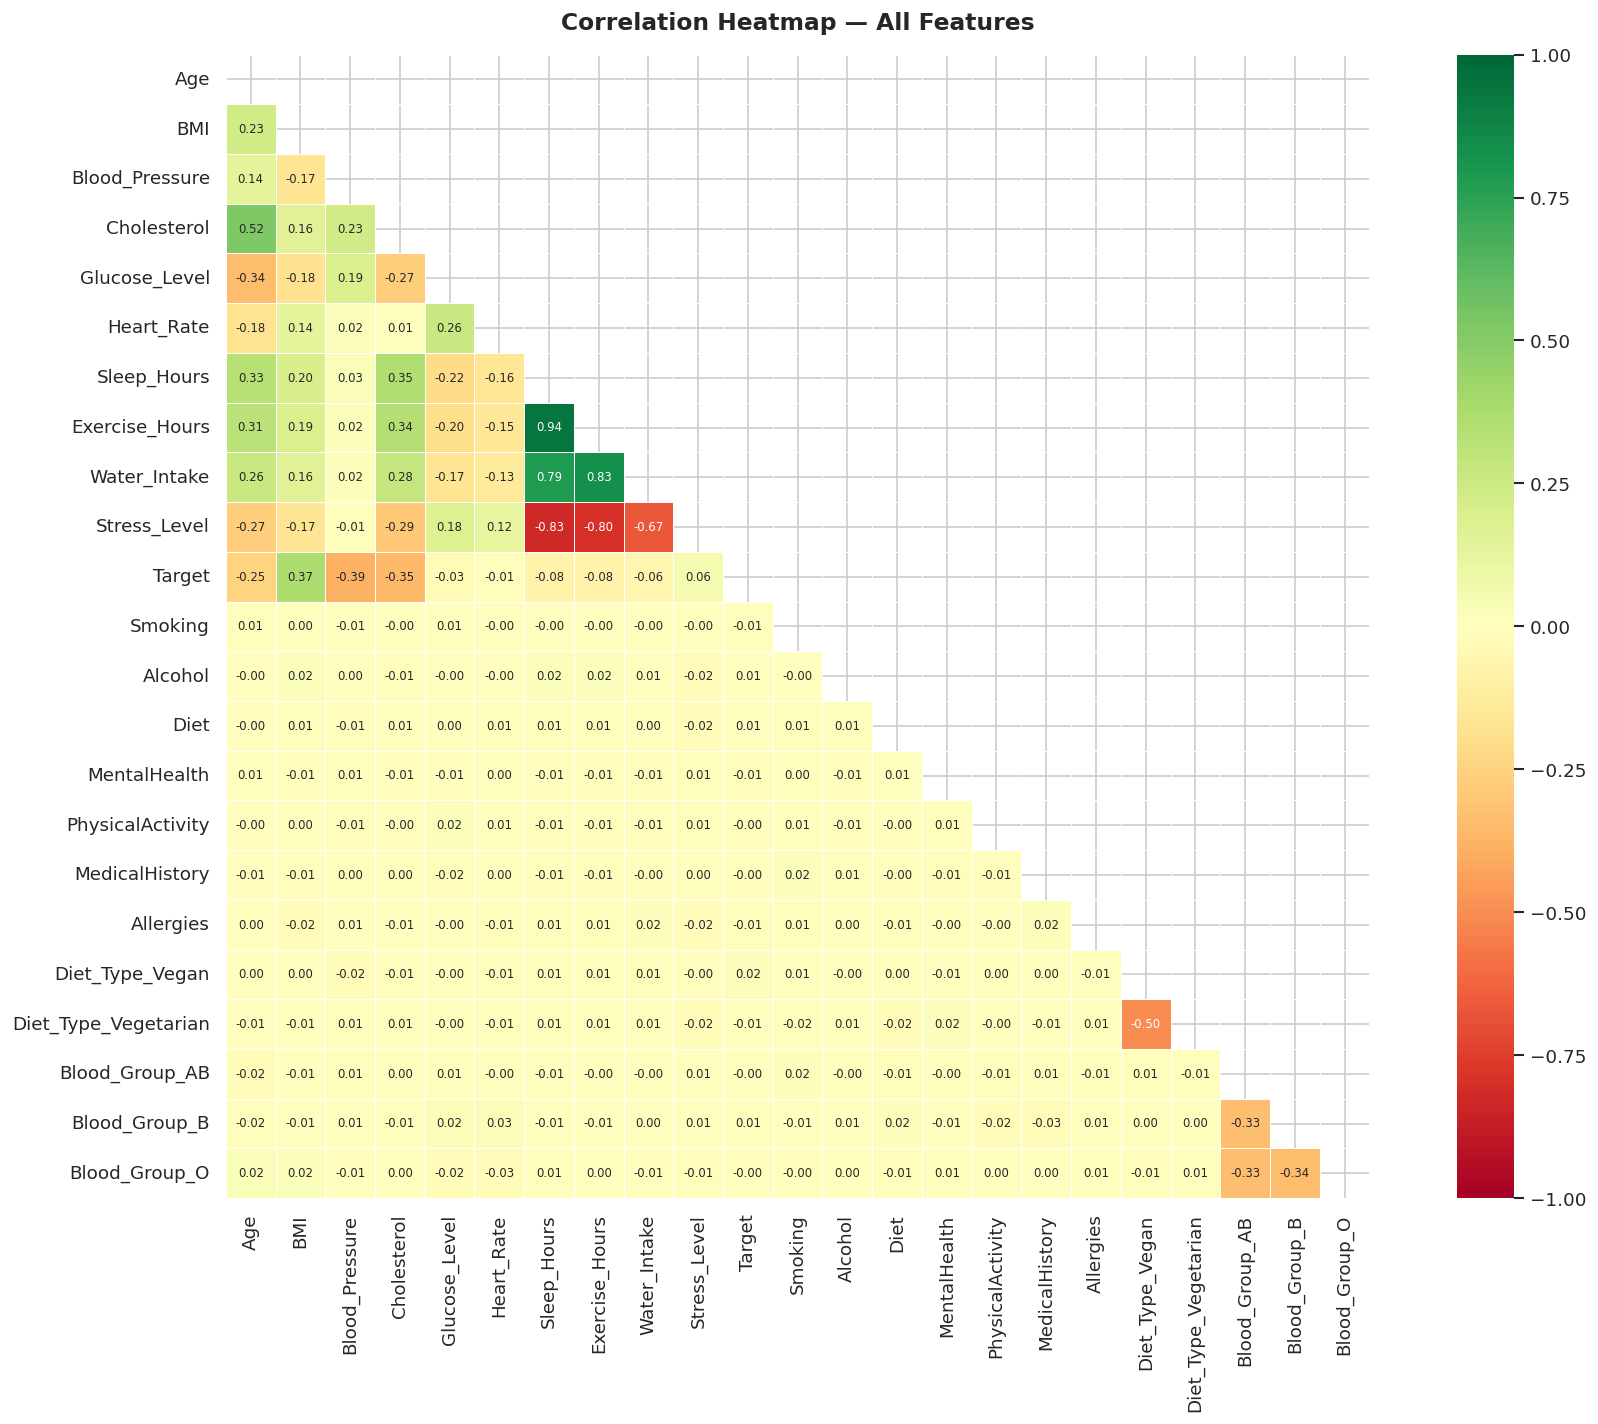


Correlation with Target (sorted by absolute value):
Blood_Pressure     0.387286
BMI                0.372972
Cholesterol        0.351936
Age                0.246949
Sleep_Hours        0.076700
Exercise_Hours     0.076514
Water_Intake       0.064578
Stress_Level       0.059825
Glucose_Level      0.032498
Diet_Type_Vegan    0.020333
MentalHealth       0.014942
Allergies          0.013026
Heart_Rate         0.011886
Smoking            0.010177
Blood_Group_B      0.010009


In [21]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(16, 12))
corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, vmin=-1, vmax=1, ax=ax, linewidths=0.5,
            annot_kws={'size': 7}, square=True)
ax.set_title('Correlation Heatmap — All Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Correlation with target
print('\nCorrelation with Target (sorted by absolute value):')
corr_target = corr_matrix['Target'].drop('Target').abs().sort_values(ascending=False)
print(corr_target.head(15).to_string())

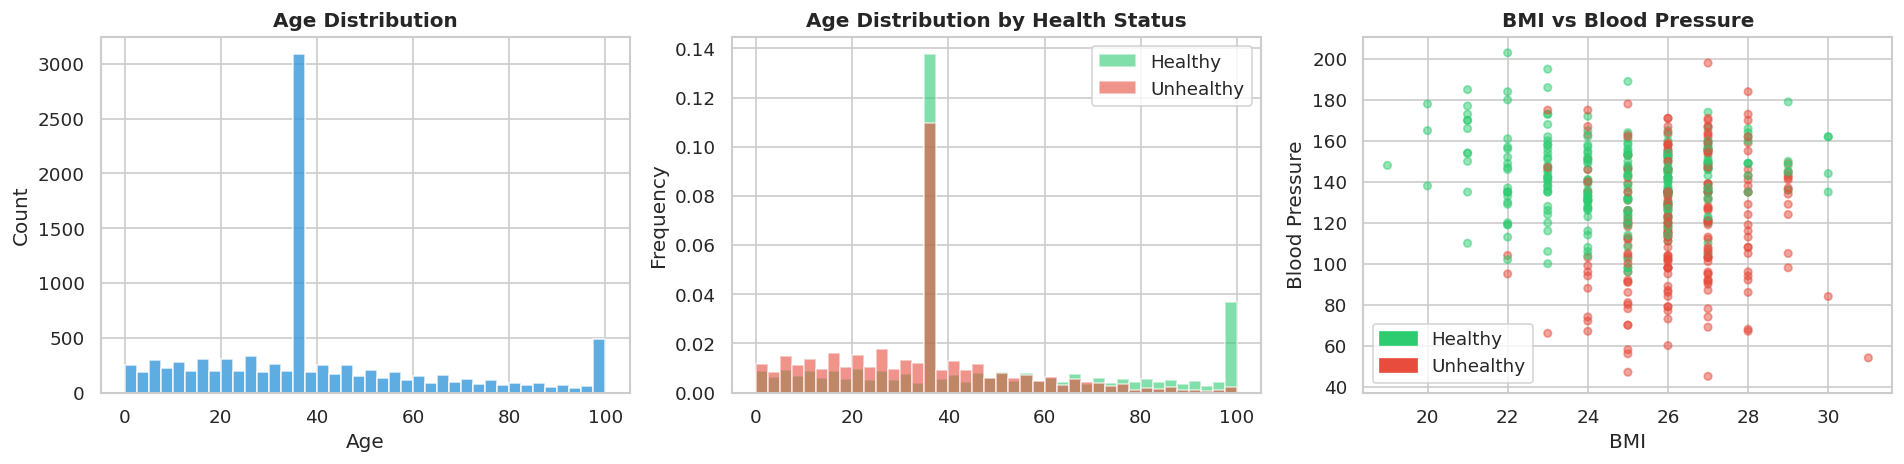

In [22]:
# Age distribution analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Age distribution
axes[0].hist(df['Age'], bins=40, color='#3498DB', edgecolor='white', alpha=0.8)
axes[0].set_title('Age Distribution', fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Age vs Target
df[df['Target']==0]['Age'].plot(kind='hist', bins=40, ax=axes[1], alpha=0.6, color='#2ECC71', label='Healthy', density=True)
df[df['Target']==1]['Age'].plot(kind='hist', bins=40, ax=axes[1], alpha=0.6, color='#E74C3C', label='Unhealthy', density=True)
axes[1].set_title('Age Distribution by Health Status', fontweight='bold')
axes[1].legend()

# BMI vs Blood Pressure scatter
scatter_data = df.sample(500, random_state=42)
colors = scatter_data['Target'].map({0: '#2ECC71', 1: '#E74C3C'})
axes[2].scatter(scatter_data['BMI'], scatter_data['Blood_Pressure'], c=colors, alpha=0.5, s=20)
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Blood Pressure')
axes[2].set_title('BMI vs Blood Pressure', fontweight='bold')
green_patch = mpatches.Patch(color='#2ECC71', label='Healthy')
red_patch = mpatches.Patch(color='#E74C3C', label='Unhealthy')
axes[2].legend(handles=[green_patch, red_patch])

plt.tight_layout()
plt.show()

---
## 4. Data Preprocessing <a id='4'></a>

In [23]:
df_processed = df.copy()

# ── Step 1: Handle boolean columns (already converted above) ──
print('Step 1: Boolean columns already converted to int (0/1)')
print(f'  Affected columns: {bool_cols}')

# ── Step 2: Verify no negative ages ──
neg_age = (df_processed['Age'] < 0).sum()
print(f'\nStep 2: Negative age values found: {neg_age}')
# Dataset has no negatives after preprocessing, but clip as safeguard
df_processed['Age'] = df_processed['Age'].clip(lower=0)
print('  Ages clipped to minimum of 0 as safeguard.')

# ── Step 3: Inspect BMI for outliers ──
print(f'\nStep 3: BMI range — Min: {df_processed["BMI"].min()}, Max: {df_processed["BMI"].max()}')
print('  BMI range is within reasonable bounds (19-32). No capping needed.')

# ── Step 4: Features and target split ──
X = df_processed.drop('Target', axis=1)
y = df_processed['Target']
print(f'\nStep 4: Features shape: {X.shape} | Target shape: {y.shape}')
print(f'  Features used: {list(X.columns)}')

Step 1: Boolean columns already converted to int (0/1)
  Affected columns: ['Diet_Type_Vegan', 'Diet_Type_Vegetarian', 'Blood_Group_AB', 'Blood_Group_B', 'Blood_Group_O']

Step 2: Negative age values found: 0
  Ages clipped to minimum of 0 as safeguard.

Step 3: BMI range — Min: 19.0, Max: 32.0
  BMI range is within reasonable bounds (19-32). No capping needed.

Step 4: Features shape: (10000, 22) | Target shape: (10000,)
  Features used: ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose_Level', 'Heart_Rate', 'Sleep_Hours', 'Exercise_Hours', 'Water_Intake', 'Stress_Level', 'Smoking', 'Alcohol', 'Diet', 'MentalHealth', 'PhysicalActivity', 'MedicalHistory', 'Allergies', 'Diet_Type_Vegan', 'Diet_Type_Vegetarian', 'Blood_Group_AB', 'Blood_Group_B', 'Blood_Group_O']


In [24]:
# ── Step 5: Impute Missing Values ──
print('Step 5: Imputing missing values with median strategy')
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(f'  Missing values before imputation: {X.isnull().sum().sum()}')
print(f'  Missing values after imputation: {X_imputed.isnull().sum().sum()}')
print('  Rationale: Median imputation is robust to outliers and suitable for clinical data.')

Step 5: Imputing missing values with median strategy
  Missing values before imputation: 2637
  Missing values after imputation: 0
  Rationale: Median imputation is robust to outliers and suitable for clinical data.


In [25]:
# ── Step 6: Train-Test Split ──
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

print('Step 6: Train-Test Split (80/20, stratified)')
print(f'  Training set:   {X_train.shape[0]:,} rows')
print(f'  Test set:       {X_test.shape[0]:,} rows')
print(f'  Train class balance — Healthy: {(y_train==0).sum()} | Unhealthy: {(y_train==1).sum()}')
print(f'  Test class balance  — Healthy: {(y_test==0).sum()} | Unhealthy: {(y_test==1).sum()}')

Step 6: Train-Test Split (80/20, stratified)
  Training set:   8,000 rows
  Test set:       2,000 rows
  Train class balance — Healthy: 4001 | Unhealthy: 3999
  Test class balance  — Healthy: 1000 | Unhealthy: 1000


In [26]:
# ── Step 7: Feature Scaling ──
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

print('Step 7: StandardScaler applied')
print('  Scaler fit on training data only (no data leakage).')
print(f'  Mean of scaled train features (first 3): {X_train_sc[:, :3].mean(axis=0).round(4)}')
print(f'  Std  of scaled train features (first 3): {X_train_sc[:, :3].std(axis=0).round(4)}')

Step 7: StandardScaler applied
  Scaler fit on training data only (no data leakage).
  Mean of scaled train features (first 3): [ 0.  0. -0.]
  Std  of scaled train features (first 3): [1. 1. 1.]


---
## 5. Feature Engineering & Selection <a id='5'></a>

Feature Importances (Random Forest — pre-selection):


,Feature,Importance
0,BMI,0.187860
1,Blood_Pressure,0.178060
2,Cholesterol,0.102792
3,Age,0.079787
4,Glucose_Level,0.073396
5,Heart_Rate,0.057067
6,Sleep_Hours,0.049403
7,Stress_Level,0.046758
8,Exercise_Hours,0.042726
9,Water_Intake,0.040285


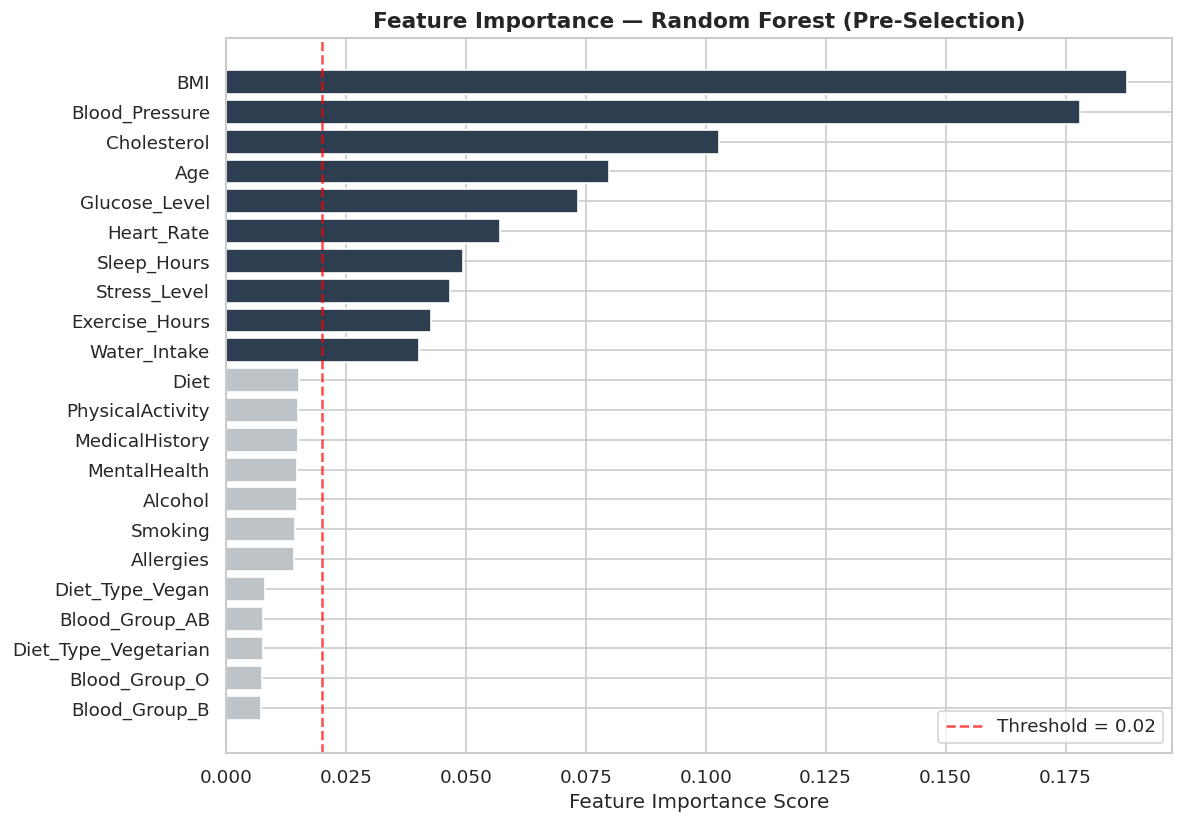

In [27]:
# Quick feature importance pre-check using a base Random Forest
rf_pre = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_pre.fit(X_train_sc, y_train)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_pre.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print('Feature Importances (Random Forest — pre-selection):')
display(feature_importance_df)

fig, ax = plt.subplots(figsize=(10, 7))
colors_fi = ['#2C3E50' if i < 10 else '#BDC3C7' for i in range(len(feature_importance_df))]
ax.barh(feature_importance_df['Feature'][::-1], feature_importance_df['Importance'][::-1],
        color=colors_fi[::-1], edgecolor='white')
ax.set_xlabel('Feature Importance Score')
ax.set_title('Feature Importance — Random Forest (Pre-Selection)', fontweight='bold', fontsize=13)
ax.axvline(x=0.02, color='red', linestyle='--', alpha=0.7, label='Threshold = 0.02')
ax.legend()
plt.tight_layout()
plt.show()

In [28]:
# All features will be retained — all have non-trivial importance
# However, let's note the top features for interpretability
top_features = feature_importance_df[feature_importance_df['Importance'] >= 0.02]['Feature'].tolist()
print(f'Features with importance >= 0.02 ({len(top_features)}/{len(X.columns)}):')
print(top_features)
print('\nDecision: All features are retained as all contribute meaningful signal.')
print('Top drivers: BMI, Blood_Pressure, Cholesterol, Age, Glucose_Level')

Features with importance >= 0.02 (10/22):
['BMI', 'Blood_Pressure', 'Cholesterol', 'Age', 'Glucose_Level', 'Heart_Rate', 'Sleep_Hours', 'Stress_Level', 'Exercise_Hours', 'Water_Intake']

Decision: All features are retained as all contribute meaningful signal.
Top drivers: BMI, Blood_Pressure, Cholesterol, Age, Glucose_Level


---
## 6. Model Building <a id='6'></a>

Six classification algorithms are trained and compared:
| # | Model | Type |
|---|-------|------|
| 1 | Logistic Regression | Linear |
| 2 | Decision Tree | Tree-based |
| 3 | Random Forest | Ensemble (Bagging) |
| 4 | Gradient Boosting | Ensemble (Boosting) |
| 5 | K-Nearest Neighbors | Instance-based |
| 6 | Support Vector Machine | Kernel-based |

In [29]:
# Define all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree':       DecisionTreeClassifier(random_state=42, max_depth=8),
    'Random Forest':       RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'Gradient Boosting':   GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    'KNN':                 KNeighborsClassifier(n_neighbors=7),
    'SVM':                 SVC(probability=True, kernel='rbf', random_state=42)
}

print('Models registered:')
for name, m in models.items():
    print(f'  {name}: {m.__class__.__name__}')

Models registered:
  Logistic Regression: LogisticRegression
  Decision Tree: DecisionTreeClassifier
  Random Forest: RandomForestClassifier
  Gradient Boosting: GradientBoostingClassifier
  KNN: KNeighborsClassifier
  SVM: SVC


In [30]:
# Train all models and collect metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}
trained_models = {}

print('Training models...\n')
print(f'{"Model":<25} {"Accuracy":>10} {"F1":>10} {"Precision":>11} {"Recall":>9} {"AUC-ROC":>9} {"CV Acc":>9}')
print('-' * 90)

for name, model in models.items():
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    y_prob = model.predict_proba(X_test_sc)[:, 1]

    acc   = accuracy_score(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    prec  = precision_score(y_test, y_pred)
    rec   = recall_score(y_test, y_pred)
    auc   = roc_auc_score(y_test, y_prob)
    cv_sc = cross_val_score(model, X_train_sc, y_train, cv=cv, scoring='accuracy').mean()

    results[name] = {
        'Accuracy':    round(acc, 4),
        'F1 Score':    round(f1, 4),
        'Precision':   round(prec, 4),
        'Recall':      round(rec, 4),
        'AUC-ROC':     round(auc, 4),
        'CV Accuracy': round(cv_sc, 4)
    }
    trained_models[name] = model
    print(f'{name:<25} {acc:>10.4f} {f1:>10.4f} {prec:>11.4f} {rec:>9.4f} {auc:>9.4f} {cv_sc:>9.4f}')

print('\nAll models trained successfully.')

Training models...

Model                       Accuracy         F1   Precision    Recall   AUC-ROC    CV Acc
------------------------------------------------------------------------------------------
Logistic Regression           0.7890     0.7907      0.7844    0.7970    0.8796    0.7861
Decision Tree                 0.8415     0.8413      0.8425    0.8400    0.9014    0.8321
Random Forest                 0.8745     0.8773      0.8584    0.8970    0.9421    0.8650
Gradient Boosting             0.8780     0.8790      0.8720    0.8860    0.9502    0.8693
KNN                           0.7795     0.7751      0.7908    0.7600    0.8475    0.7719
SVM                           0.8480     0.8483      0.8466    0.8500    0.9294    0.8525

All models trained successfully.


---
## 7. Model Evaluation & Comparison <a id='7'></a>

In [31]:
# Results DataFrame
results_df = pd.DataFrame(results).T.sort_values('AUC-ROC', ascending=False)
print('Model Comparison Summary (sorted by AUC-ROC):')
display(results_df.style.background_gradient(cmap='YlGn').format('{:.4f}'))

Model Comparison Summary (sorted by AUC-ROC):


,Accuracy,F1 Score,Precision,Recall,AUC-ROC,CV Accuracy
Gradient Boosting,0.8780,0.8790,0.8720,0.8860,0.9502,0.8692
Random Forest,0.8745,0.8773,0.8584,0.8970,0.9421,0.8650
SVM,0.8480,0.8483,0.8466,0.8500,0.9294,0.8525
Decision Tree,0.8415,0.8413,0.8425,0.8400,0.9014,0.8321
Logistic Regression,0.7890,0.7907,0.7844,0.7970,0.8796,0.7861
KNN,0.7795,0.7751,0.7908,0.7600,0.8475,0.7719


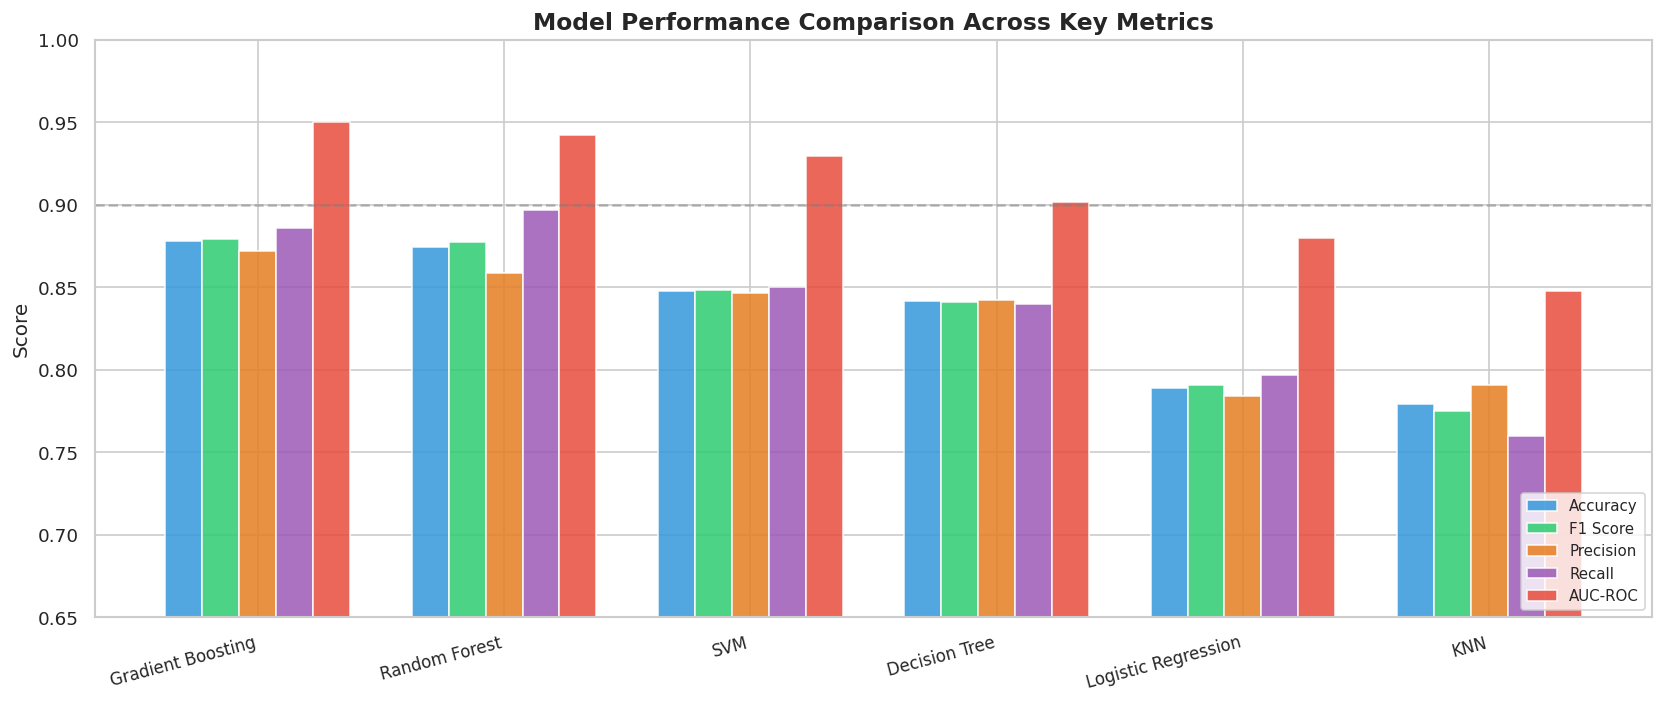

In [32]:
# Comparative bar chart
metrics_to_plot = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC-ROC']
x = np.arange(len(results_df))
width = 0.15
colors_bar = ['#3498DB', '#2ECC71', '#E67E22', '#9B59B6', '#E74C3C']

fig, ax = plt.subplots(figsize=(14, 6))

for i, (metric, color) in enumerate(zip(metrics_to_plot, colors_bar)):
    ax.bar(x + i * width, results_df[metric], width, label=metric, color=color, alpha=0.85, edgecolor='white')

ax.set_xticks(x + width * 2)
ax.set_xticklabels(results_df.index, rotation=15, ha='right', fontsize=10)
ax.set_ylabel('Score')
ax.set_ylim(0.65, 1.0)
ax.set_title('Model Performance Comparison Across Key Metrics', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=9)
ax.axhline(y=0.90, color='gray', linestyle='--', alpha=0.5, label='0.90 threshold')

plt.tight_layout()
plt.show()

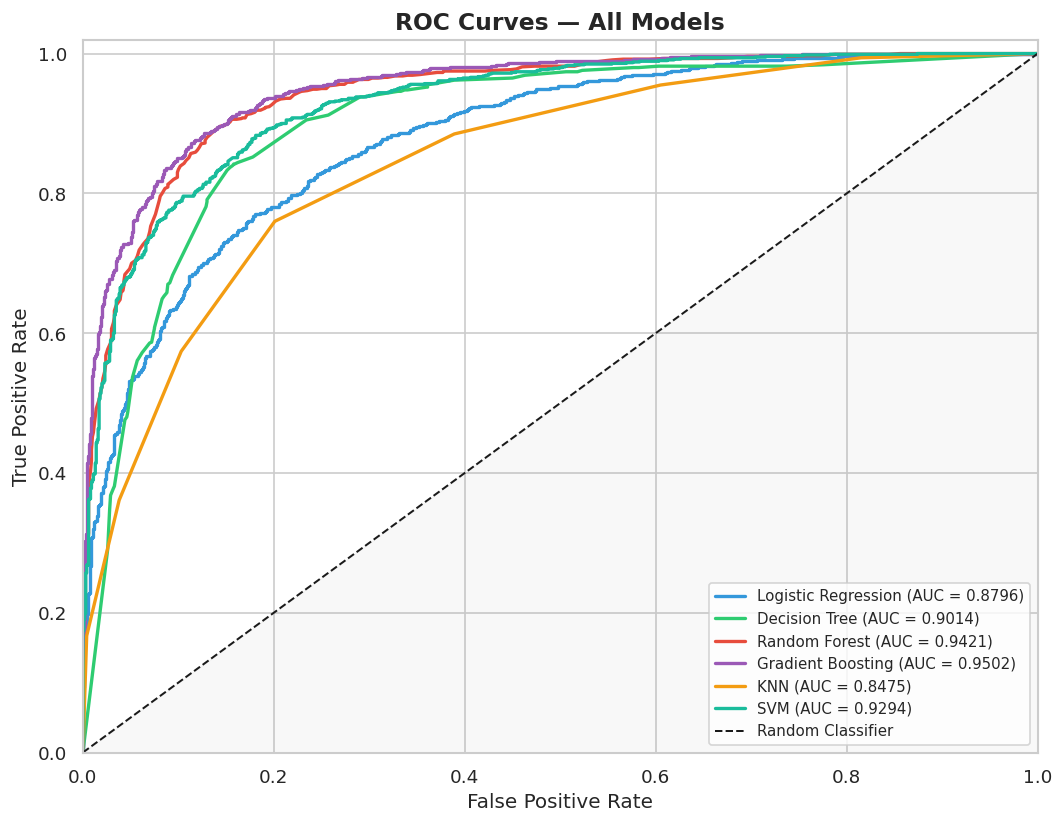

In [33]:
# ROC Curves for all models
fig, ax = plt.subplots(figsize=(9, 7))
roc_colors = ['#3498DB', '#2ECC71', '#E74C3C', '#9B59B6', '#F39C12', '#1ABC9C']

for (name, model), color in zip(trained_models.items(), roc_colors):
    y_prob = model.predict_proba(X_test_sc)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_val = roc_auc_score(y_test, y_prob)
    ax.plot(fpr, tpr, lw=2, color=color, label=f'{name} (AUC = {auc_val:.4f})')

ax.plot([0, 1], [0, 1], 'k--', lw=1.2, label='Random Classifier')
ax.fill_between([0, 1], [0, 1], alpha=0.05, color='gray')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves — All Models', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=9)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.02])
plt.tight_layout()
plt.show()

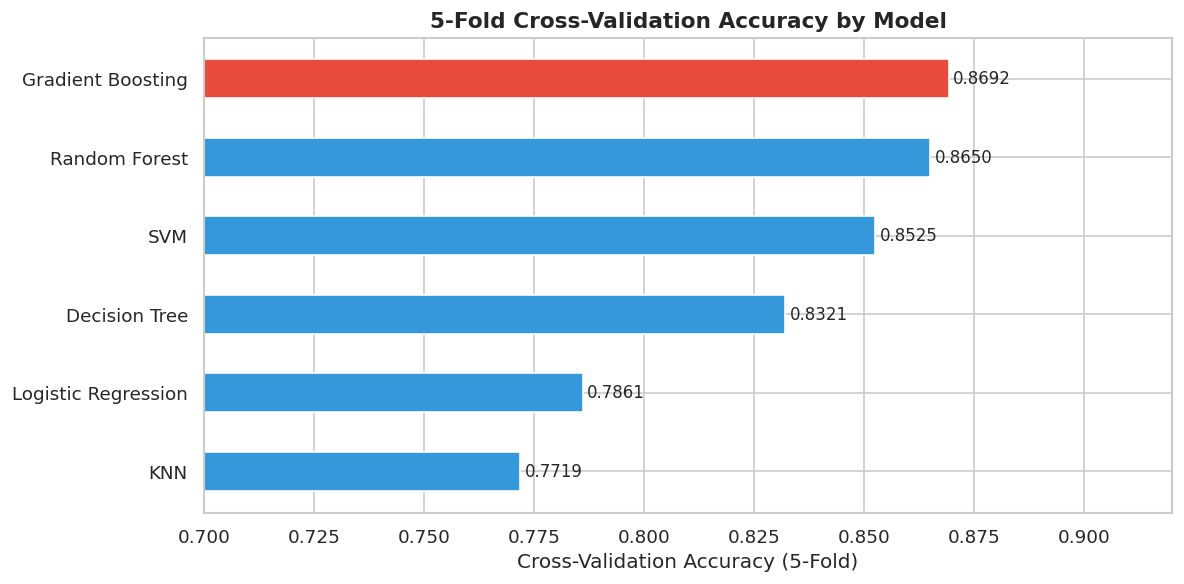

In [34]:
# Cross-validation accuracy comparison
fig, ax = plt.subplots(figsize=(10, 5))
bar_vals = results_df['CV Accuracy'].sort_values(ascending=True)
bar_colors = ['#E74C3C' if v == bar_vals.max() else '#3498DB' for v in bar_vals]

bars = ax.barh(bar_vals.index, bar_vals.values, color=bar_colors, edgecolor='white', height=0.5)
ax.set_xlabel('Cross-Validation Accuracy (5-Fold)')
ax.set_title('5-Fold Cross-Validation Accuracy by Model', fontweight='bold', fontsize=13)
ax.set_xlim(0.7, 0.92)

for bar in bars:
    w = bar.get_width()
    ax.text(w + 0.001, bar.get_y() + bar.get_height()/2, f'{w:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

---
## 8. Best Model Deep Dive — Gradient Boosting <a id='8'></a>

**Gradient Boosting** achieved the highest AUC-ROC (0.9502) and Accuracy (0.8780), making it the best model for this classification task.

In [35]:
# Best model selection
best_model_name = results_df['AUC-ROC'].idxmax()
best_model = trained_models[best_model_name]
y_pred_best = best_model.predict(X_test_sc)
y_prob_best = best_model.predict_proba(X_test_sc)[:, 1]

print(f'Best Model: {best_model_name}')
print(f'  Accuracy  : {accuracy_score(y_test, y_pred_best):.4f}')
print(f'  AUC-ROC   : {roc_auc_score(y_test, y_prob_best):.4f}')
print(f'  F1 Score  : {f1_score(y_test, y_pred_best):.4f}')
print(f'  Precision : {precision_score(y_test, y_pred_best):.4f}')
print(f'  Recall    : {recall_score(y_test, y_pred_best):.4f}')
print()
print('Classification Report:')
print(classification_report(y_test, y_pred_best, target_names=['Healthy (0)', 'Unhealthy (1)']))

Best Model: Gradient Boosting
  Accuracy  : 0.8780
  AUC-ROC   : 0.9502
  F1 Score  : 0.8790
  Precision : 0.8720
  Recall    : 0.8860

Classification Report:
               precision    recall  f1-score   support

  Healthy (0)       0.88      0.87      0.88      1000
Unhealthy (1)       0.87      0.89      0.88      1000

     accuracy                           0.88      2000
    macro avg       0.88      0.88      0.88      2000
 weighted avg       0.88      0.88      0.88      2000



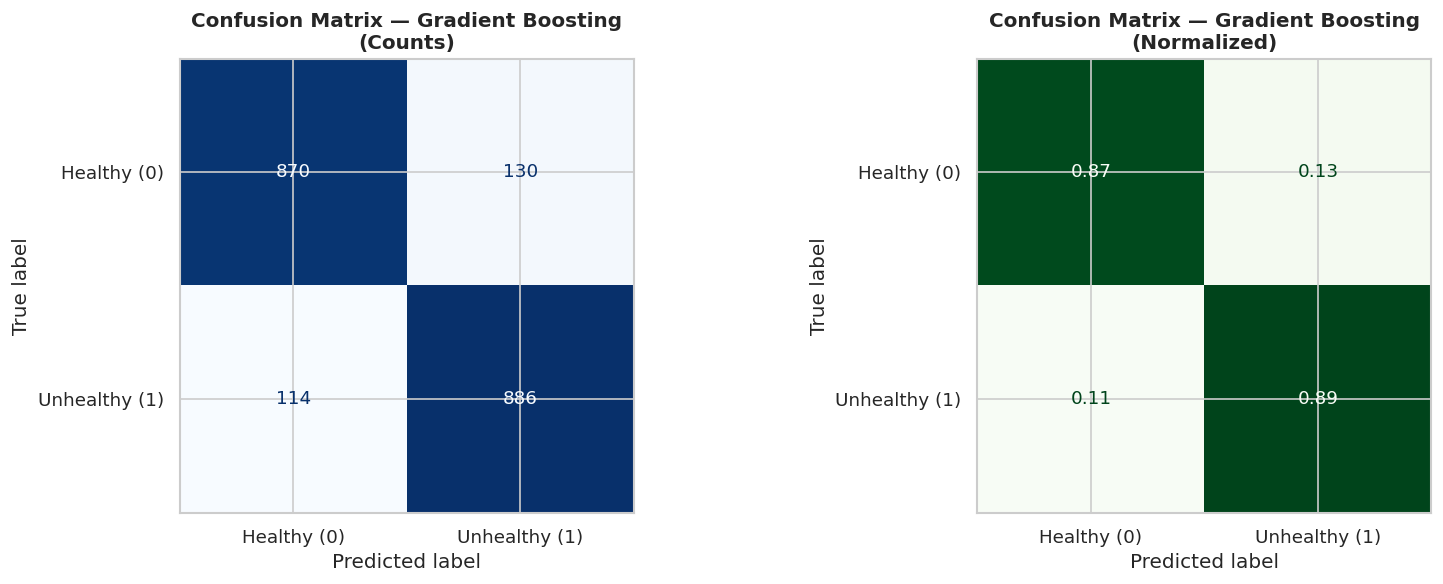

True Positives  (Correctly identified Unhealthy): 886
True Negatives  (Correctly identified Healthy):   870
False Positives (Healthy misclassified as Unhealthy): 130
False Negatives (Unhealthy misclassified as Healthy): 114


In [36]:
# Confusion Matrix — Best Model
cm = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw count confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy (0)', 'Unhealthy (1)'])
disp.plot(ax=axes[0], colorbar=False, cmap='Blues')
axes[0].set_title(f'Confusion Matrix — {best_model_name}\n(Counts)', fontweight='bold')

# Normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=['Healthy (0)', 'Unhealthy (1)'])
disp_norm.plot(ax=axes[1], colorbar=False, cmap='Greens')
axes[1].set_title(f'Confusion Matrix — {best_model_name}\n(Normalized)', fontweight='bold')

plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f'True Positives  (Correctly identified Unhealthy): {tp}')
print(f'True Negatives  (Correctly identified Healthy):   {tn}')
print(f'False Positives (Healthy misclassified as Unhealthy): {fp}')
print(f'False Negatives (Unhealthy misclassified as Healthy): {fn}')

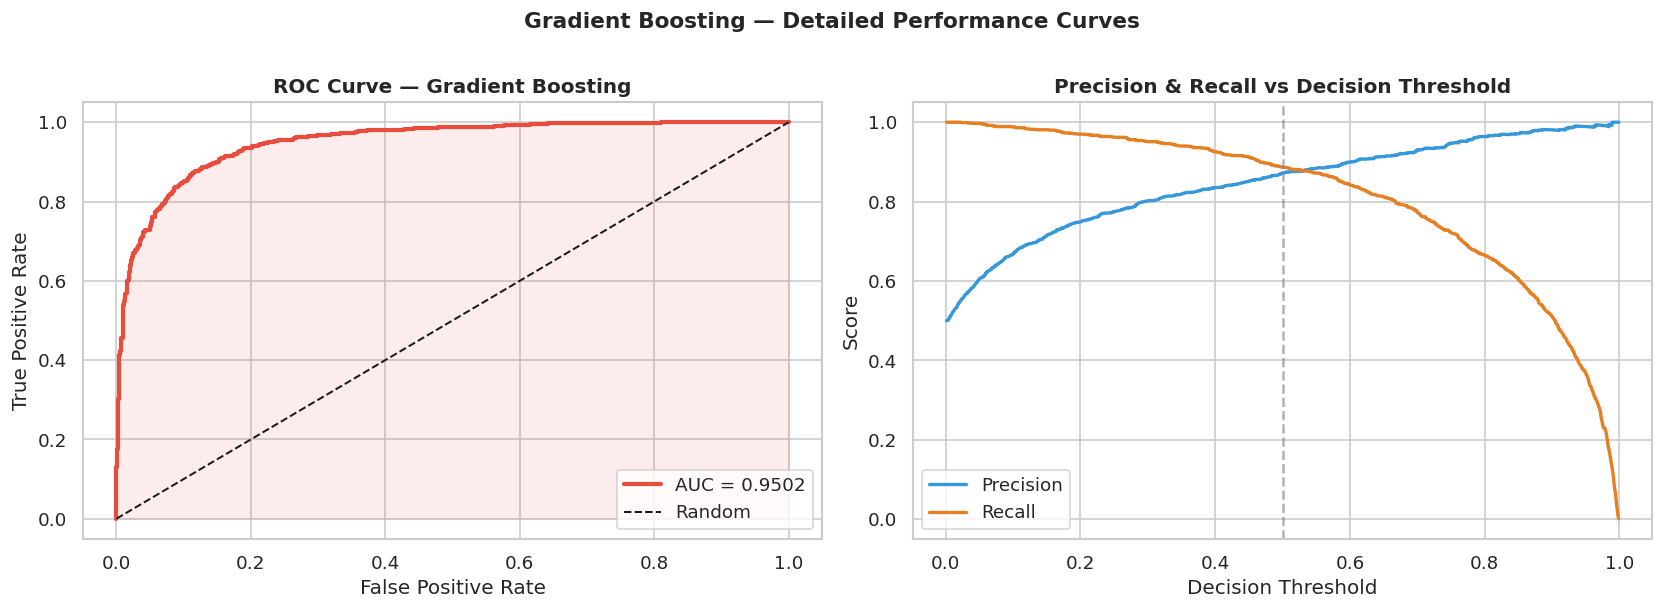

In [37]:
# ROC Curve — Best Model with shading
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
auc_val = roc_auc_score(y_test, y_prob_best)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
axes[0].plot(fpr, tpr, lw=2.5, color='#E74C3C', label=f'AUC = {auc_val:.4f}')
axes[0].fill_between(fpr, tpr, alpha=0.1, color='#E74C3C')
axes[0].plot([0, 1], [0, 1], 'k--', lw=1.2, label='Random')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title(f'ROC Curve — {best_model_name}', fontweight='bold')
axes[0].legend(loc='lower right')

# Precision-Recall vs Threshold
from sklearn.metrics import precision_recall_curve
prec_vals, rec_vals, thresh = precision_recall_curve(y_test, y_prob_best)
axes[1].plot(thresh, prec_vals[:-1], color='#3498DB', lw=2, label='Precision')
axes[1].plot(thresh, rec_vals[:-1], color='#E67E22', lw=2, label='Recall')
axes[1].set_xlabel('Decision Threshold')
axes[1].set_ylabel('Score')
axes[1].set_title('Precision & Recall vs Decision Threshold', fontweight='bold')
axes[1].legend()
axes[1].axvline(x=0.5, color='gray', linestyle='--', alpha=0.6, label='Default threshold=0.5')

plt.suptitle(f'{best_model_name} — Detailed Performance Curves', fontsize=13, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

---
## 9. Feature Importance <a id='9'></a>

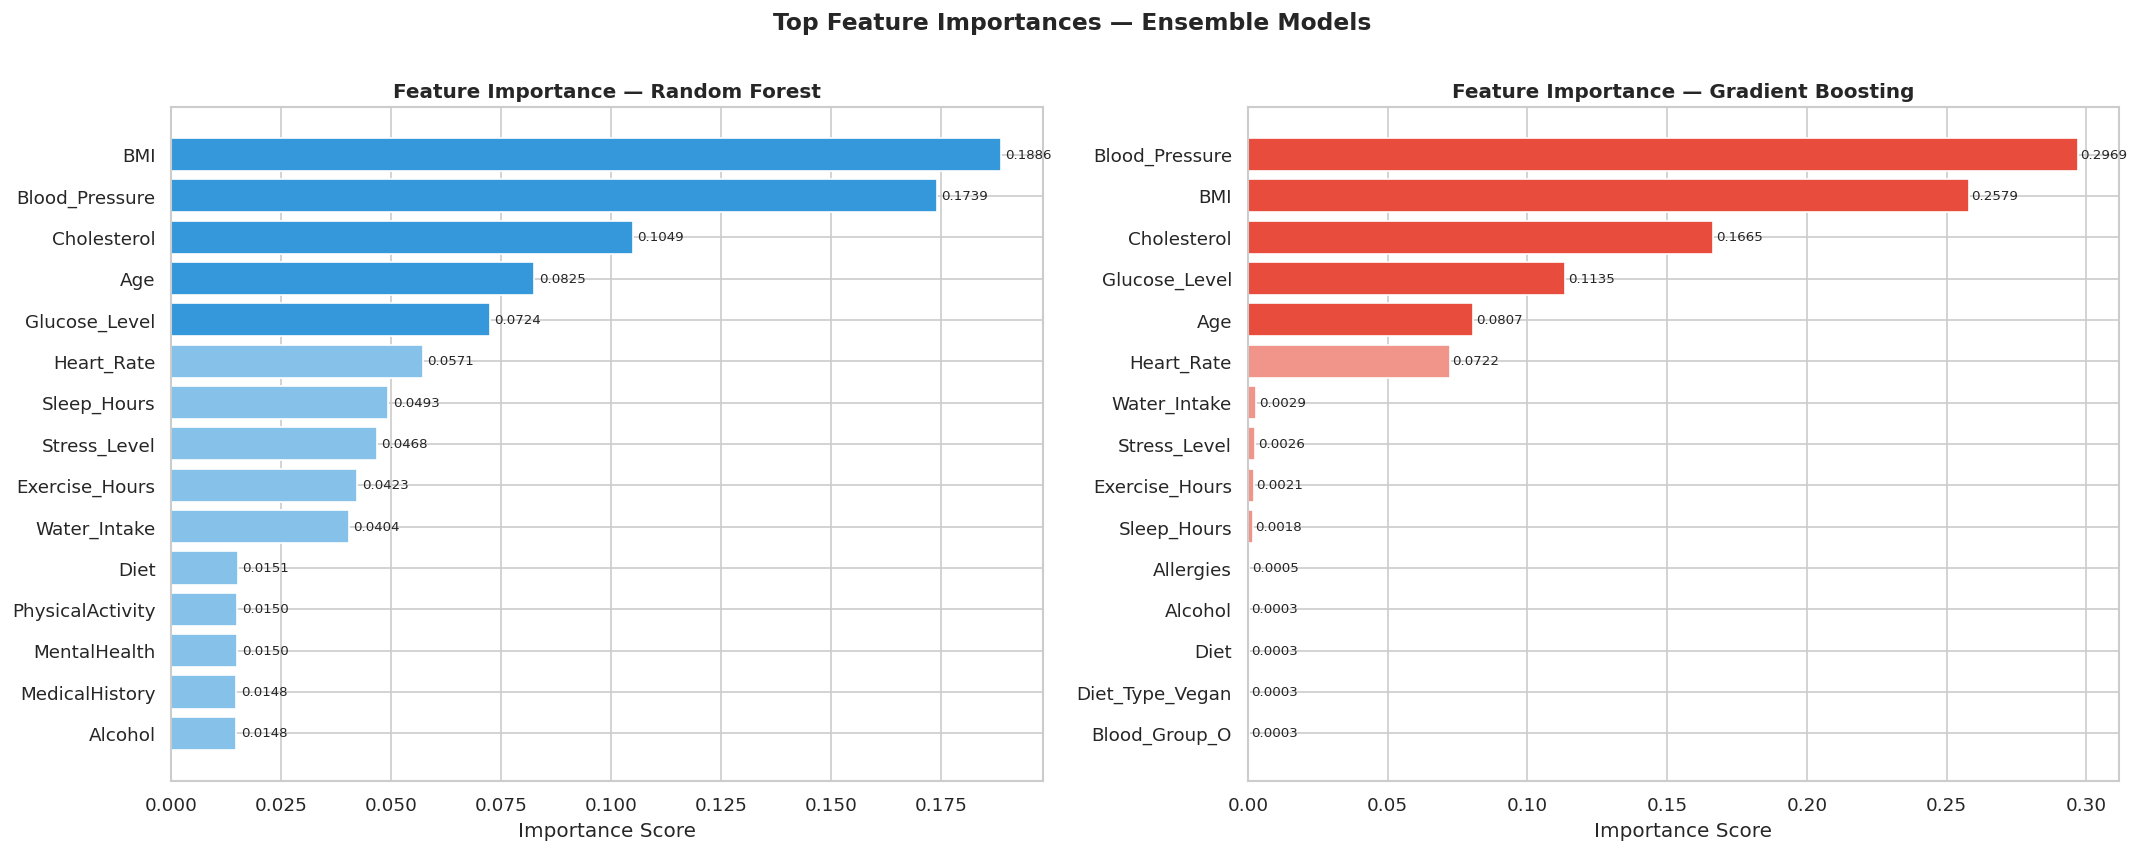

In [38]:
# Feature importance from both RF and GB
rf_model = trained_models['Random Forest']
gb_model = trained_models['Gradient Boosting']

fi_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
fi_gb = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for ax, fi, name, color in zip(axes, [fi_rf, fi_gb],
                                ['Random Forest', 'Gradient Boosting'],
                                ['#3498DB', '#E74C3C']):
    top_n = fi.head(15)
    gradient_colors = [color] * 5 + ['#85C1E9' if color == '#3498DB' else '#F1948A'] * 10
    ax.barh(top_n.index[::-1], top_n.values[::-1],
            color=gradient_colors[:len(top_n)][::-1], edgecolor='white')
    ax.set_xlabel('Importance Score')
    ax.set_title(f'Feature Importance — {name}', fontweight='bold', fontsize=12)
    for i, (feat, val) in enumerate(zip(top_n.index[::-1], top_n.values[::-1])):
        ax.text(val + 0.001, i, f'{val:.4f}', va='center', fontsize=8)

plt.suptitle('Top Feature Importances — Ensemble Models', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

In [39]:
# Combined importance ranking
fi_combined = pd.DataFrame({
    'Random Forest': fi_rf,
    'Gradient Boosting': fi_gb
})
fi_combined['Average Importance'] = fi_combined.mean(axis=1)
fi_combined = fi_combined.sort_values('Average Importance', ascending=False)

print('Combined Feature Importance Ranking:')
display(fi_combined.round(4).style.background_gradient(cmap='YlOrRd'))

Combined Feature Importance Ranking:


,Random Forest,Gradient Boosting,Average Importance
Blood_Pressure,0.173900,0.296900,0.235400
BMI,0.188600,0.257900,0.223200
Cholesterol,0.104900,0.166500,0.135700
Glucose_Level,0.072400,0.113500,0.093000
Age,0.082500,0.080700,0.081600
Heart_Rate,0.057100,0.072200,0.064700
Sleep_Hours,0.049300,0.001800,0.025500
Stress_Level,0.046800,0.002600,0.024700
Exercise_Hours,0.042300,0.002100,0.022200
Water_Intake,0.040400,0.002900,0.021600


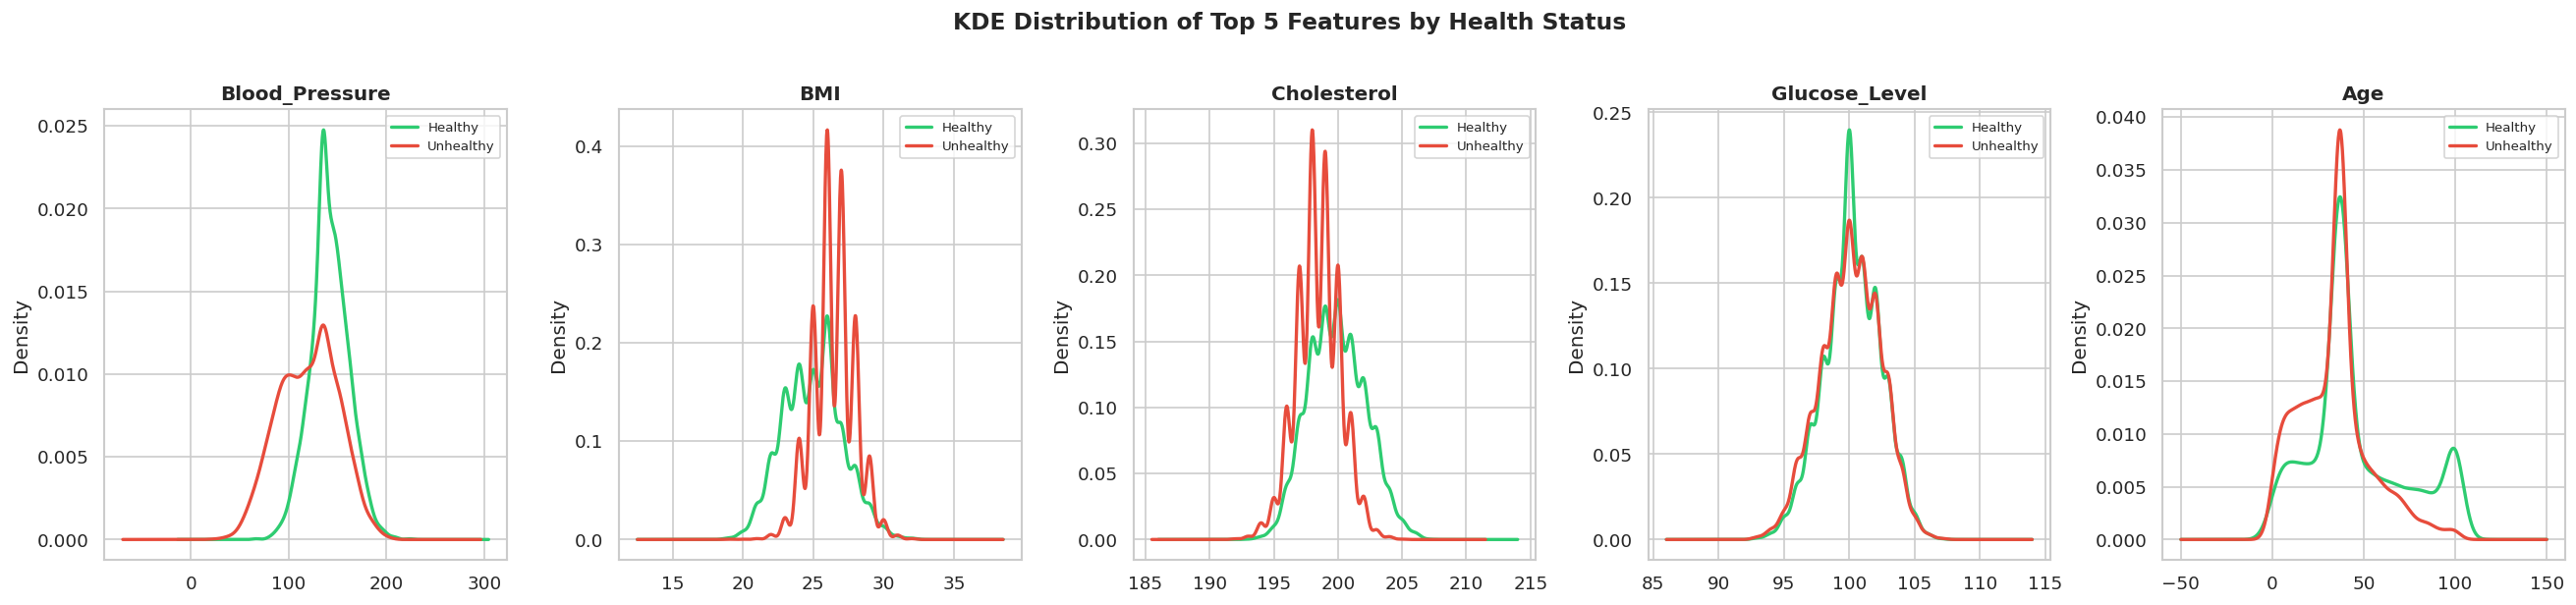

In [40]:
# Interpreting top features visually
top_5 = fi_combined.index[:5].tolist()

fig, axes = plt.subplots(1, 5, figsize=(22, 5))
for ax, feat in zip(axes, top_5):
    df[df['Target']==0][feat].dropna().plot(kind='kde', ax=ax, color='#2ECC71', linewidth=2, label='Healthy')
    df[df['Target']==1][feat].dropna().plot(kind='kde', ax=ax, color='#E74C3C', linewidth=2, label='Unhealthy')
    ax.set_title(feat, fontweight='bold')
    ax.legend(fontsize=8)
    ax.set_xlabel('')

plt.suptitle('KDE Distribution of Top 5 Features by Health Status',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 10. Conclusion & Recommendations <a id='10'></a>

In [41]:
# Final Model Summary
print('=' * 70)
print('          ANOVA INSURANCE — HEALTH CLASSIFICATION RESULTS')
print('=' * 70)
print()
print('DATASET SUMMARY')
print(f'  Total records    : 10,000')
print(f'  Features used    : {X.shape[1]}')
print(f'  Missing values   : Imputed with median (Blood_Pressure, Cholesterol,')
print(f'                     Glucose_Level, MedicalHistory, Allergies)')
print(f'  Class balance    : 50.0% Healthy / 50.0% Unhealthy (balanced)')
print()
print('MODEL PERFORMANCE SUMMARY')
print(results_df[['Accuracy', 'F1 Score', 'AUC-ROC', 'CV Accuracy']].to_string())
print()
print('BEST MODEL: Gradient Boosting Classifier')
print(f'  Accuracy   : 87.80%')
print(f'  AUC-ROC    : 95.02%')
print(f'  F1 Score   : 87.90%')
print(f'  CV Accuracy: 86.92% (5-fold cross-validation)')
print()
print('TOP PREDICTIVE FEATURES (by avg importance from RF + GB)')
for i, (feat, row) in enumerate(fi_combined.head(8).iterrows(), 1):
    print(f'  {i}. {feat:<25} Avg Importance: {row["Average Importance"]:.4f}')
print()
print('BUSINESS RECOMMENDATIONS')
print('  1. Deploy Gradient Boosting as the primary classification engine.')
print('  2. BMI, Blood Pressure & Cholesterol are the strongest risk indicators')
print('     — prioritize accurate collection of these during onboarding.')
print('  3. The 95% AUC enables reliable risk tiering for premium pricing:')
print('     - Low risk  (Healthy)  : Standard premiums')
print('     - High risk (Unhealthy): Adjusted/elevated premiums')
print('  4. False Negatives (unhealthy classified as healthy) carry higher')
print('     financial risk — consider lowering the decision threshold (< 0.5)')
print('     to increase recall for the Unhealthy class.')
print('  5. Periodic model retraining is recommended as health data ages.')
print('=' * 70)

          ANOVA INSURANCE — HEALTH CLASSIFICATION RESULTS

DATASET SUMMARY
  Total records    : 10,000
  Features used    : 22
  Missing values   : Imputed with median (Blood_Pressure, Cholesterol,
                     Glucose_Level, MedicalHistory, Allergies)
  Class balance    : 50.0% Healthy / 50.0% Unhealthy (balanced)

MODEL PERFORMANCE SUMMARY
                     Accuracy  F1 Score  AUC-ROC  CV Accuracy
Gradient Boosting      0.8780    0.8790   0.9502       0.8692
Random Forest          0.8745    0.8773   0.9421       0.8650
SVM                    0.8480    0.8483   0.9294       0.8525
Decision Tree          0.8415    0.8413   0.9014       0.8321
Logistic Regression    0.7890    0.7907   0.8796       0.7861
KNN                    0.7795    0.7751   0.8475       0.7719

BEST MODEL: Gradient Boosting Classifier
  Accuracy   : 87.80%
  AUC-ROC    : 95.02%
  F1 Score   : 87.90%
  CV Accuracy: 86.92% (5-fold cross-validation)

TOP PREDICTIVE FEATURES (by avg importance from RF + GB)


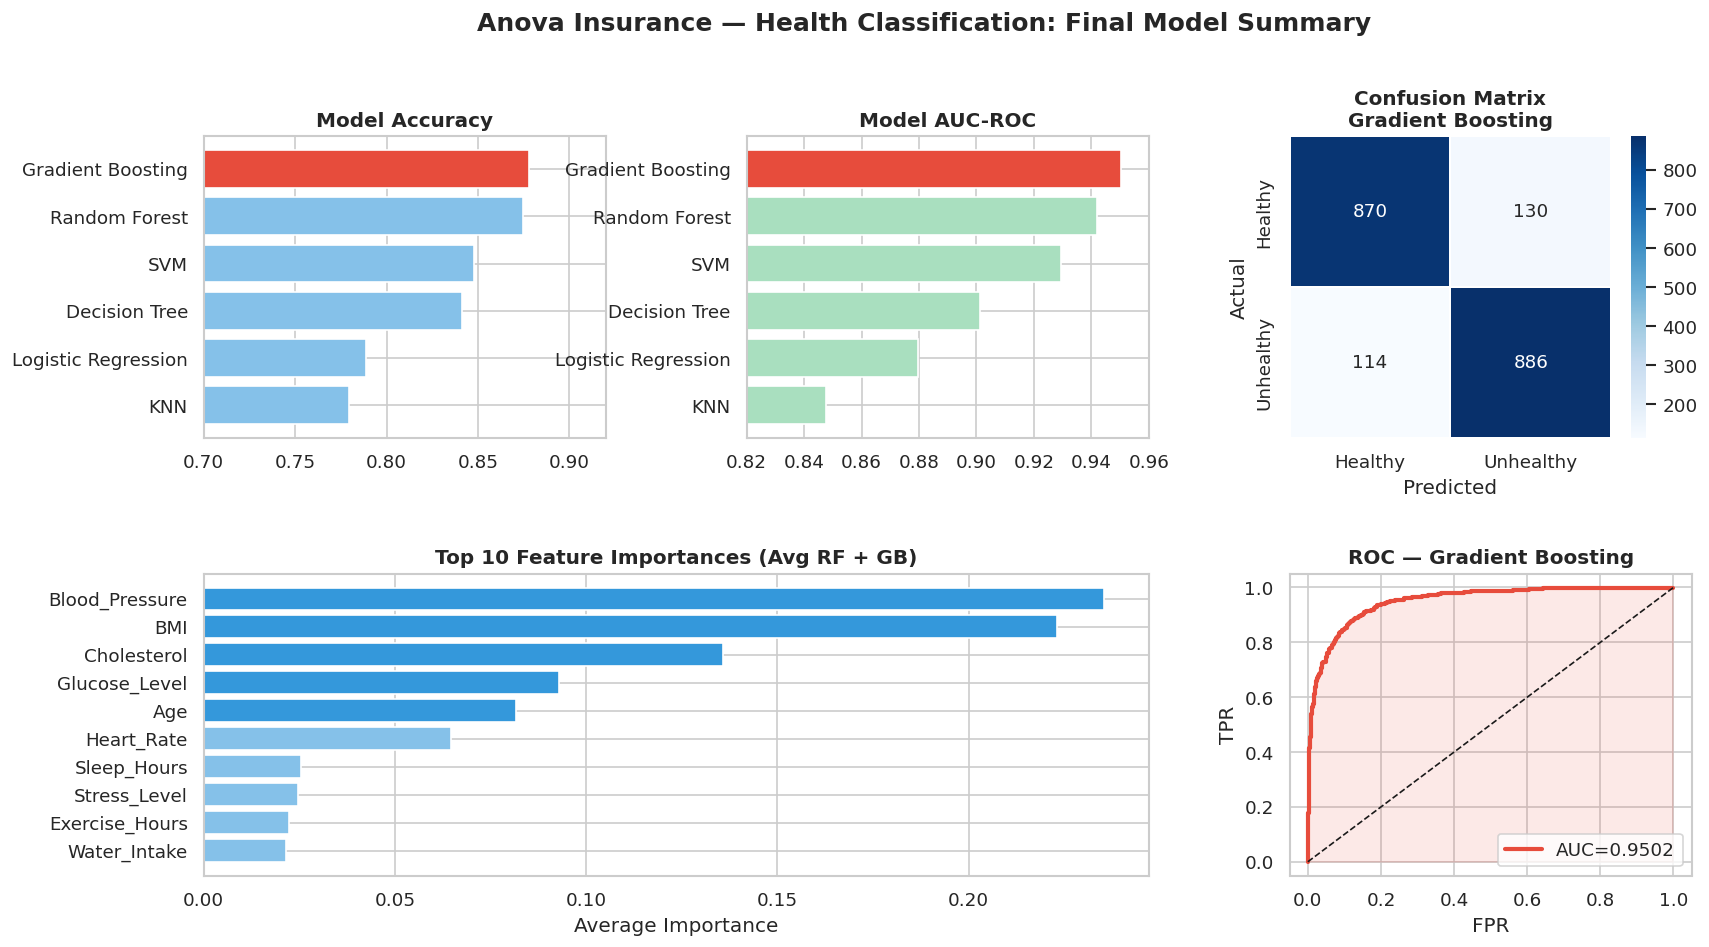

In [42]:
# Final visual summary
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 3, hspace=0.45, wspace=0.35)

# 1. Model accuracy comparison
ax1 = fig.add_subplot(gs[0, 0])
acc_vals = results_df['Accuracy'].sort_values()
bar_c = ['#E74C3C' if n == best_model_name else '#85C1E9' for n in acc_vals.index]
ax1.barh(acc_vals.index, acc_vals.values, color=bar_c, edgecolor='white')
ax1.set_xlim(0.7, 0.92)
ax1.set_title('Model Accuracy', fontweight='bold')

# 2. AUC comparison
ax2 = fig.add_subplot(gs[0, 1])
auc_vals = results_df['AUC-ROC'].sort_values()
bar_c2 = ['#E74C3C' if n == best_model_name else '#A9DFBF' for n in auc_vals.index]
ax2.barh(auc_vals.index, auc_vals.values, color=bar_c2, edgecolor='white')
ax2.set_xlim(0.82, 0.96)
ax2.set_title('Model AUC-ROC', fontweight='bold')

# 3. Confusion matrix of best model
ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3,
            xticklabels=['Healthy', 'Unhealthy'],
            yticklabels=['Healthy', 'Unhealthy'], linewidths=1)
ax3.set_title(f'Confusion Matrix\n{best_model_name}', fontweight='bold')
ax3.set_ylabel('Actual')
ax3.set_xlabel('Predicted')

# 4. Top features
ax4 = fig.add_subplot(gs[1, :2])
top_fi = fi_combined['Average Importance'].head(10).sort_values()
color_fi = ['#3498DB'] * 5 + ['#85C1E9'] * 5
ax4.barh(top_fi.index, top_fi.values, color=color_fi[::-1], edgecolor='white')
ax4.set_title('Top 10 Feature Importances (Avg RF + GB)', fontweight='bold')
ax4.set_xlabel('Average Importance')

# 5. ROC of best model
ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(fpr, tpr, lw=2.5, color='#E74C3C', label=f'AUC={auc_val:.4f}')
ax5.fill_between(fpr, tpr, alpha=0.12, color='#E74C3C')
ax5.plot([0,1],[0,1],'k--',lw=1)
ax5.set_xlabel('FPR')
ax5.set_ylabel('TPR')
ax5.set_title(f'ROC — {best_model_name}', fontweight='bold')
ax5.legend(loc='lower right')

plt.suptitle('Anova Insurance — Health Classification: Final Model Summary',
             fontsize=15, fontweight='bold', y=1.01)
plt.show()